In [2]:
import numpy as np
import matplotlib.pyplot as plt

datadir = '../data/UJIndoorLoc/'

# anomaly
x2 = np.load(datadir + 'std1.npy').squeeze()
y2 = np.load(datadir + 'mu_loss1.npy').squeeze()
# normal
x1 = np.load(datadir + 'std.npy').squeeze()
y1 = np.load(datadir + 'mu_loss.npy').squeeze()

print(x2.shape, y2.shape, x1.shape, y1.shape)

(9492, 10) (9492, 522) (508, 10) (508, 522)


838 85
0.024436839999738533 85.05334454736878 0.020492987118773405 191.97551986070366
(9492,) (9492,) (508,) (508,)


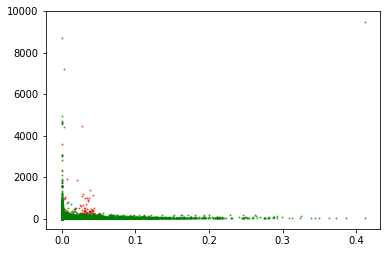

In [3]:
x2sum = np.sum(x2, axis = 1).squeeze()
y2sum = np.sum(y2, axis = 1).squeeze()
x1sum = np.sum(x1, axis = 1).squeeze()
y1sum = np.sum(y1, axis = 1).squeeze()

fig = plt.figure()
ax = plt.subplot()
ax.scatter(x1sum, y1sum,s=1, c='red', alpha=0.6)
ax.scatter(x2sum, y2sum,s=1, c='green', alpha=0.6) 


print(len(y2sum[y2sum > 200]), len(y1sum[y1sum > 200]))
# print(len(y2sum[y2sum < 150]), len(y1sum[y1sum < 150]))

print(x2sum.mean(), y2sum.mean(), x1sum.mean(), y1sum.mean())
print(x2sum.shape, y2sum.shape, x1sum.shape, y1sum.shape)

In [7]:
# first is normal, secord is anomaly

# kdd99 
upper = 250 #102.5 #10000000 #102.5 #58.5  #46    #20.22
lower = 40 #0.1
# upper1 = 20.15  #7.6      #16    #20.06 #20.15 #nan 

# # letter
# upper = 41.6  #31.3 #33.8 #37 #41.6
# lower = 17.5

# # thyroid
# upper = 2 #0.4  #0.57 #0.95 #2
# lower = 0.04

# y1 = y1sum
# y2 = y2sum
# x1 = x1sum
# x2 = x2sum
print(y1.shape, y2.shape, x1.shape, x2.shape)

# anomalyInstance = np.array([y1[np.where(y1sum > upper)[0]], x1[np.where(y1sum > upper)[0]]]).T
anomalyInstance = np.concatenate((y1[np.where(y1sum > upper)[0]], x1[np.where(y1sum > upper)[0]]), axis=1)
# tmp = np.array([y2[np.where(y2sum > upper)[0]], x2[np.where(y2sum > upper)[0]]]).T
tmp = np.concatenate((y2[np.where(y2sum > upper)[0]], x2[np.where(y2sum > upper)[0]]), axis=1)
print(len(anomalyInstance) + len(tmp))
# anomalyInstance = np.array([y1[np.where(y1 > upper1)[0]], x1[np.where(y1 > upper1)[0]]]).T
# anomalyInstance = np.concatenate((y1[np.where(y1sum > upper1)[0]], x1[np.where(y1sum > upper1)[0]]), axis=1)
print(len(anomalyInstance) + len(tmp))


anomalyInstance = np.concatenate((anomalyInstance, tmp), axis=0)
print('anomaly:',anomalyInstance.shape)


normalInstance = []
# normalInstance = np.array([y1[np.where(y1 < lower)[0]], x1[np.where(y1 < lower)[0]]]).T
normalInstance = np.concatenate((y1[np.where(y1sum < lower)[0]], x1[np.where(y1sum < lower)[0]]), axis=1)
# tmp = np.array([y2[np.where(y2 < lower)[0]], x2[np.where(y2 < lower)[0]]]).T
tmp = np.concatenate((y2[np.where(y2sum < lower)[0]], x2[np.where(y2sum < lower)[0]]), axis=1)

normalInstance = np.concatenate((normalInstance, tmp), axis=0)
print('normal:', normalInstance.shape)
instances = np.concatenate((anomalyInstance, normalInstance), axis=0)
print('total instance:', instances.shape)
labels = [0 for i in range(len(anomalyInstance))]
labels.extend([1 for i in range(len(normalInstance))])
labels = np.array(labels)
print('total label:', labels.shape)
for i in range(1, len(normalInstance) // len(anomalyInstance)):
    instances = np.concatenate((instances, anomalyInstance), axis=0)
    labels = np.concatenate((labels, [0 for j in range(len(anomalyInstance))]), axis=0)
#     print(instances.shape, labels.shape)

np.save('../data/activity/training_data.npy', instances)
np.save('../data/activity/traning_label.npy', labels)
# print(instances)
# print(labels)
# anomalyInstance = np.array([y1, x1]).T
anomalyInstance = np.concatenate((y1, x1), axis=1)
# normalInstance = np.array([y2, x2]).T
normalInstance = np.concatenate((y2, x2), axis=1)
instances = np.concatenate((anomalyInstance, normalInstance), axis=0)

labels = [0 for i in range(len(anomalyInstance))]
labels.extend([1 for i in range(len(normalInstance))])
labels = np.array(labels)
print(instances.shape)
# print(instances)
# print(labels)
np.save('../data/activity/testing_data.npy', instances) 
np.save('../data/activity/testing_label.npy', labels)

(508, 522) (9492, 522) (508, 10) (9492, 10)
740
740
anomaly: (740, 532)
normal: (5452, 532)
total instance: (6192, 532)
total label: (6192,)
(10000, 532)
